# House Price Prediction of King County

### Abstract

In this assignment, I have applied the machine learning to a real world problem of prediction of house prices of King County. The aim of this assignment was to apply various machine learning algorithms and find out whether this dataset give maximum accuracy if we are treating this dataset as a classification problem or regression a regression problem. In order to do classification, I have added one variable which acts as price quantitative variable. I have applied Random Forest, XGBoost and Logistic regression for classification and Linear Regression, Random Forest regression, XGBoost Regression and Gradient Boosting regression in order to do regression. The XGBoost classification was the best model for this dataset and I was able to achieve 90.73% accurate predictions.

# Approach

Algorithms used.

* For Part A:
    * Bagging Algorithm : Random Forest Classifier
    * Boosting Algorithm : XGBoost Classifier
* For Part B:
    * Logistic Regression
* For Part C:
    * Bagging Algorithm : Random Forest Regressor
    * Boosting Algorithm : XGBoost Regressor
* For Part D:
    * Linear Regression 
* For Part E:
    * Gradient Boosting Regression

### Importing Libraries

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold

## Dataset

King County House Price prediction https://www.kaggle.com/harlfoxem/housesalesprediction/home This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [64]:
data = pd.read_csv("king_county_cleansed.csv")

In [65]:
data.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


1. index :- It is the unique numeric number assigned to each house being sold. 
2. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features. 
3. bedrooms :- It determines number of bedrooms in a house. 
4. bathrooms :- It determines number of bathrooms in a bedroom of a house. 
5. sqft_living :- It is the measurement variable which determines the measurement of house in square foot. 
6. sqft_lot : It is also the measurement variable which determines square foot of the lot. 
7. floors: It determines total floors means levels of house. 
8. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
9. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes. 
10. condition : It determines the overall condition of a house on a scale of 1 to 5. 
11. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 12. 
13. sqft_above : It determines square footage of house apart from basement. 
14. sqft_basement : It determines square footage of the basement of the house. 
15. yr_built : It detrmines the date of building of the house. 
16. yr_renovated : It detrmines year of renovation of house. 
17. zipcode : It determines the zipcode of the location of the house. 
18. lat : It determines the latitude of the location of the house. 
19. long : It determines the longitude of the location of the house. 
20. sqft_living15 : Living room area in 2015(implies-- some renovations) 
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations) 

In [144]:
print(data.isnull().any()) #Finding out if there is any null value in our data

index               False
price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
waterfront          False
sqft_above          False
sqft_basement       False
yr_built            False
yr_renovated        False
lat                 False
long                False
sqft_living15       False
sqft_lot15          False
basement_present    False
renovated           False
floors#1.0          False
floors#1.5          False
floors#2.0          False
floors#2.5          False
floors#3.0          False
floors#3.5          False
view#0              False
view#1              False
view#2              False
view#3              False
view#4              False
condition#1         False
condition#2         False
condition#3         False
condition#4         False
condition#5         False
grade#1             False
grade#3             False
grade#4             False
grade#5             False
grade#6             False
grade#7     

In [67]:
data.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Analysis

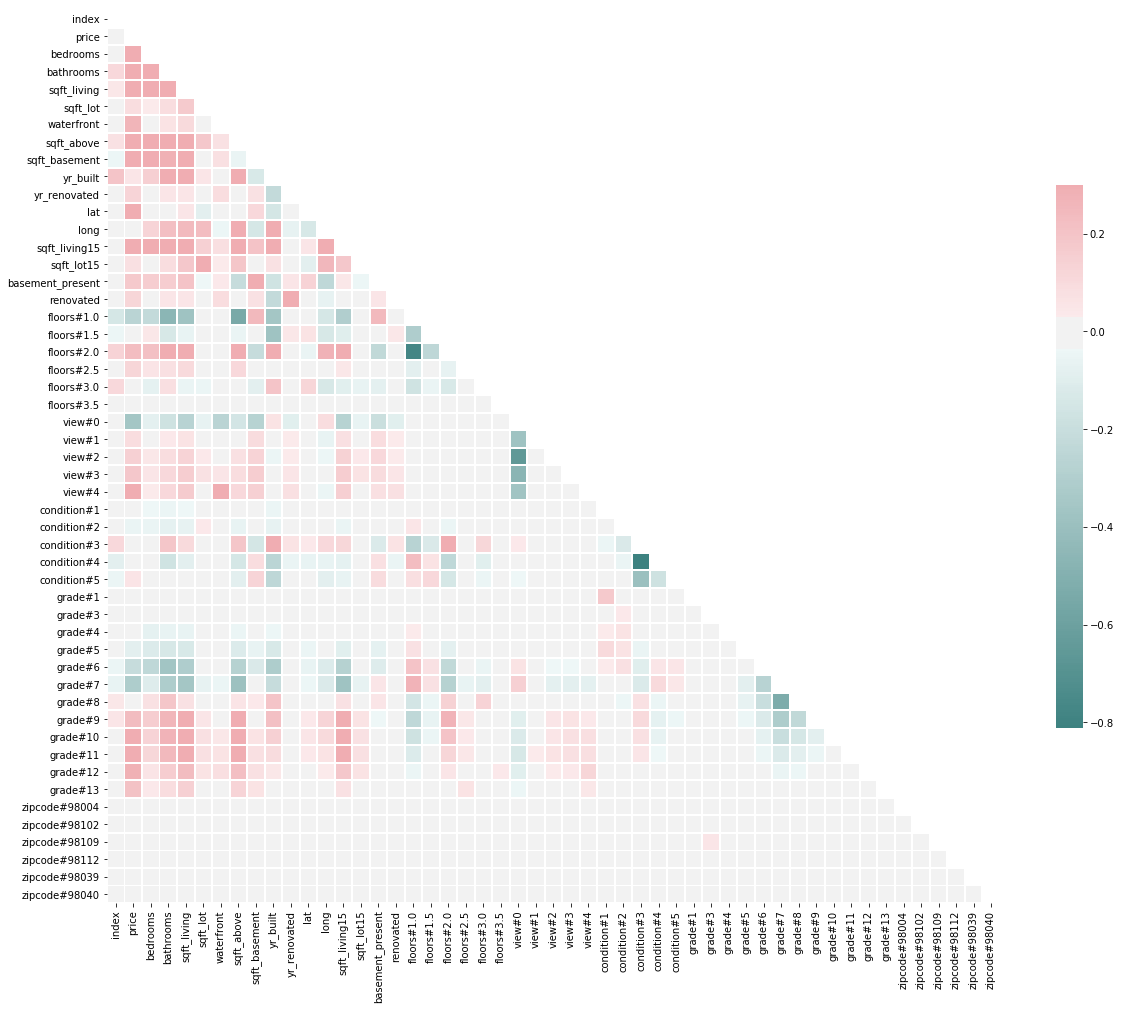

In [68]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(190, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

## Part A - Classification with Trees

We will use Random Forest Classifier (Bagging based tree algorithm) and XGBoost classifier (Boosting tree algorithm)

In order to do classification, we need to add catagorical variable which represents house price as HIGH or LOW. We will achieve that by adding one coloumn "Price_Catagory". '0' will represent price below the median value and '1' will represent price above median value.

In [69]:
median_price = data.loc[:,"price"].median()
print(median_price)

450000.0


In [70]:
data['Price_Catagory'] = data['price'].apply(lambda x: 1 if x > median_price else 0)
data[['price','Price_Catagory']].head(10)

,price,Price_Catagory
0,437500,0
1,790000,1
2,675000,1
3,555000,1
4,440000,0
5,295000,0
6,470000,1
7,550000,1
8,313000,0
9,626000,1


In [32]:
data.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,Price_Catagory
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


## 1. Random Forest Classifier

#### Initially we will find out which features are important.

In [71]:
data.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'Price_Catagory'],
      dtype='object')

In [72]:
X_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040' ]]

y=data['Price_Catagory']


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [73]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training set
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [74]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
top_features = feature_imp.head(10)
top_features

lat              0.276781
sqft_living      0.115603
sqft_living15    0.093530
sqft_above       0.082022
long             0.054576
sqft_lot15       0.054455
sqft_lot         0.047742
yr_built         0.046660
bathrooms        0.041580
sqft_basement    0.029322
dtype: float64

No handles with labels found to put in legend.


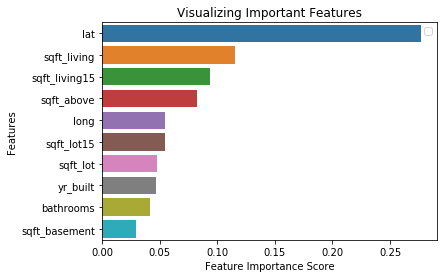

In [75]:
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Above graph represents the importance of features from our test data in decending order.

#### Now we will estimate the important hyper-parameters
To find out important hyper-prameters, we will use Random Search with Cross Validation and Grid Search with Cross Validation

In [76]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### (1) Random Search with Cross validation

In [77]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 82, 155, 227, 300]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator=rfc_base, param_distributions=random_grid,
                              n_iter = 100,  
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 82, 155, 227, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

##### Below hyper-parameters are important

In [78]:
rfc_random.best_params_

{'n_estimators': 227,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

#### Now, we will eveluate our Random Search by evaluating AUC

In [79]:
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [46]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [47]:
best_random = rfc_random.best_estimator_

In [80]:
print('AUC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

AUC for best model : 0.9028382894849601


### (2) Grid Search with Cross Validation

In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200,2000]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [83]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.0min finished


In [84]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [85]:
best_grid = grid_search.best_estimator_

In [86]:
print('AUC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

AUC for best grid search model : 0.902194608697308


## 2. XGBoost Classifier

In [87]:
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [89]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.28%


## Estimation the important hyper-parameters of XGBoost
We will implement Grid Search to tune the hyper-parameters of XGBoost.

First we will find out the best number of trees "n_estimators". 

Best: -0.211984 using {'n_estimators': 350}
-0.255265 (0.009489) with: {'n_estimators': 50}
-0.230343 (0.009820) with: {'n_estimators': 100}
-0.221181 (0.009622) with: {'n_estimators': 150}
-0.217069 (0.008981) with: {'n_estimators': 200}
-0.214744 (0.008929) with: {'n_estimators': 250}
-0.213037 (0.008564) with: {'n_estimators': 300}
-0.211984 (0.008411) with: {'n_estimators': 350}


Text(0, 0.5, 'Log Loss')

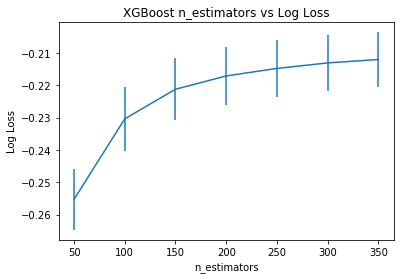

In [90]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

It is evident from the above graph that best number of trees was n_estimators=350 resulting in a log loss of -0.211984. Here cross validation log loss are negative and this is because scikit-learn cross validation framework inverted them. he reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

### Tuning the size of decision trees in XGBoost

In [91]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Best: -0.209406 using {'max_depth': 7}
-0.329156 (0.006704) with: {'max_depth': 1}
-0.230343 (0.009820) with: {'max_depth': 3}
-0.212807 (0.009777) with: {'max_depth': 5}
-0.209406 (0.010230) with: {'max_depth': 7}
-0.211069 (0.011007) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

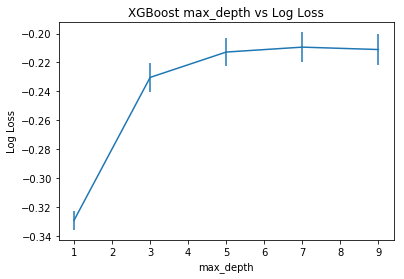

In [92]:
#Plotting the graph between max_depth and log loss
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')

After plotting the graph between max_depth Vs Log Loss, we can see that best value for size of trees is 7.

## Tuning Number of Trees and Max Depth in XGBoost

In [93]:
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 15.3min finished


Best: -0.210151 using {'max_depth': 6, 'n_estimators': 250}
-0.214088 (0.011127) with: {'max_depth': 6, 'n_estimators': 350}
-0.211701 (0.010660) with: {'max_depth': 6, 'n_estimators': 300}
-0.210151 (0.010235) with: {'max_depth': 6, 'n_estimators': 250}
-0.216530 (0.011404) with: {'max_depth': 6, 'n_estimators': 400}
-0.220256 (0.011819) with: {'max_depth': 7, 'n_estimators': 350}
-0.216602 (0.011769) with: {'max_depth': 7, 'n_estimators': 300}
-0.213426 (0.011104) with: {'max_depth': 7, 'n_estimators': 250}
-0.223985 (0.012417) with: {'max_depth': 7, 'n_estimators': 400}
-0.229484 (0.012542) with: {'max_depth': 8, 'n_estimators': 350}
-0.224255 (0.011515) with: {'max_depth': 8, 'n_estimators': 300}
-0.219678 (0.011198) with: {'max_depth': 8, 'n_estimators': 250}
-0.234252 (0.012867) with: {'max_depth': 8, 'n_estimators': 400}
-0.237558 (0.014798) with: {'max_depth': 9, 'n_estimators': 350}
-0.231977 (0.013937) with: {'max_depth': 9, 'n_estimators': 300}
-0.226259 (0.012909) with: {'m

Plotting the graph between n_estimators Vs Log Loss

Text(0, 0.5, 'Log Loss')

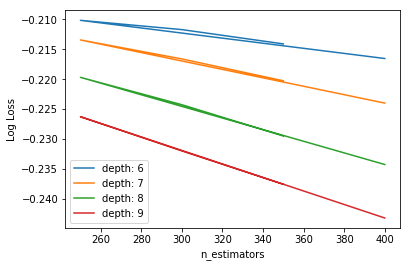

In [94]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

# Model with the best values for Hyper parameters

In [95]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [96]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [97]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [99]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.9073363422553585


<table style="width:50%">
  <tr>
    <th>Classification Model</th>
    <th>ROC</th> 
  </tr>
  <tr>
    <td>XGBoost Classifier</td>
    <td>0.9073</td> 
  </tr>
    <tr>
    <td>Random Forest Classifier</td>
    <td>0.9021</td> 
  </tr>
</table>

From above table we can see that ROC for XGBoost classifier is higher than that of Random forest Classifier. Hence we can conclude that XGBoost classifier works best for this dataset.

# Part B - Classification using Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [101]:
data['price_cat_log'] = data['price'].apply(lambda x: 1 if x > median_price else 0)

In [102]:
price_cat_log=data['price_cat_log']
y_log=price_cat_log

In [103]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(data[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [104]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


c:\users\prati\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        17:46:18   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

From above summary, it is evident that most significant values of Z-score is for "sqft_living" and "yr_built".

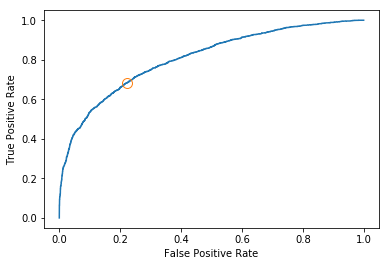

In [106]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [107]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

<table style="width:50%">
  <tr>
    <th>Classification Model</th>
    <th>AUC</th> 
  </tr>
    <tr>
    <td>XGBoost Classifier</td>
    <td>0.9073</td> 
  </tr>
  <tr>
    <td>Random Forest Classifier</td>
    <td>0.9021</td> 
  </tr>
    <tr>
    <td>Logistics Regression</td>
    <td>0.8078</td> 
  </tr>
</table>

#### Above table shows that Logistic Regression model gives less ROC value compared with XGBoost and Random Forest. Best model for classification for this dataset is XGBoost.

# Part D - Regression with Trees

### 1. Random Forest Regression

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [109]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=data['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

#### We will estimate the important hyper-parameters

There are two methods by which we can find out imporatant hyper-parameters.
1. Random search with Cross validation
2. Grid Search with Cross valudation

### Random search with Cross validation

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [111]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [112]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 74204.2045 degrees.
Accuracy = 85.96%.


In [113]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 70579.4860 degrees.
Accuracy = 86.68%.


### Grid search with Cross Validation

In [115]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [116]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  6.8min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [117]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [118]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 91189.4563 degrees.
Accuracy = 81.98%.


### 2. XGBoost Regression

In [119]:
from xgboost import XGBRegressor

In [120]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 83131.8112 degrees.
Accuracy = 84.17%.


In [121]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Now we will find out best hyper-parameters for XGBoost

Firstly, we will tune the "n_estimators":

In [122]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710374 using {'n_estimators': 350}
0.680795 (0.013441) with: {'n_estimators': 50}
0.693039 (0.013864) with: {'n_estimators': 100}
0.700034 (0.013476) with: {'n_estimators': 150}
0.704375 (0.013137) with: {'n_estimators': 200}
0.707372 (0.013333) with: {'n_estimators': 250}
0.708954 (0.013427) with: {'n_estimators': 300}
0.710374 (0.013627) with: {'n_estimators': 350}


In [123]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [124]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 72681.2423 degrees.
Accuracy = 86.21%.


## 3. Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regression = LinearRegression().fit(X_train_reg,y_train_reg)

In [127]:
evaluate_reg(regression,X_test_reg,y_test_reg)

Model Performance
Average Error: 120357.4160 degrees.
Accuracy = 76.38%.


76.38204178208801

# Part E: Gradient Boosting Regression

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train_reg,y_train_reg)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
#prediction = gradient_boosting.predict(X_test)
gradient_boosting.score(X_test_reg,y_test_reg)

0.8481662410388889

We can see that without hyper-parameters tuning, accuracy is 84.81%.

Now we will tune the hyper-parameters:

In [131]:
param_grid={'n_estimators':[100,400,800,1000], 'learning_rate': [0.25,0.35,0.6],# 0.05, 0.02, 0.01],
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,8], 
            'max_features':[0.5,0.3,1.0]
           }
regressor = GridSearchCV(estimator=gradient_boosting, cv=3, param_grid=param_grid, n_jobs=16,verbose=1)
regressor.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   27.2s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  5.6min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 17.4min
[Parallel(n_jobs=16)]: Done 648 out of 648 | elapsed: 27.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=16,
       param_grid={'n_estimators': [100, 400, 800, 1000], 'learning_rate': [0.25, 0.35, 0.6], 'max_depth': [4, 6], 'min_samples_leaf': [3, 5, 8], 'max_features': [0.5, 0.3, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [132]:
regressor.best_estimator_
gradient_boosting_tunned = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=4, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
gradient_boosting_tunned.fit(X_train_reg,y_train_reg)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=4, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
evaluate_reg(gradient_boosting_tunned,X_test_reg,y_test_reg)

Model Performance
Average Error: 67516.7990 degrees.
Accuracy = 87.04%.


87.04326292879969

#### Below are the best hyper-parameters:

In [138]:
print(regressor.best_params_)

{'learning_rate': 0.25, 'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 3, 'n_estimators': 400}


#### Regression Models summary:

<table style="text-align:left"> 
    <thead> 
    <tr> <th>Number</th> <th>Model Name</th> <th>Accuracy</th> </tr> </thead> <tbody> 
    <tr> 
         <th scope='row'>1</th> <td style="text-align:center">Gradient Boosting Regression</td> <td>87.04%</td> </tr> 
    <tr> 
         <th scope='row'>2</th> <td style="text-align:center">Random Forest Regression</td> <td>86.68%</td> </tr> 
    <tr> 
         <th scope='row'>3</th> <td style="text-align:center">XGBoost Regression</td> <td>86.21%</td> </tr> 
    <tr> <th scope ='row'>4</th><td style="text-align:center"> Linear Regression </td><td>76.38%</td></tr>

From above table, we can conclude that Gradient Boosting Regression gives higest accuracy.

# Conclusions

<table style="width:50%">
  <tr>
    <th>Classification Model</th>
    <th>AUC</th> 
  </tr>
    <tr>
    <td>XGBoost Classifier</td>
    <td>0.9073</td> 
  </tr>
  <tr>
    <td>Random Forest Classifier</td>
    <td>0.9021</td> 
  </tr>
    <tr>
    <td>Logistics Regression</td>
    <td>0.8078</td> 
  </tr>
</table>

<table style="width:50%">
  <tr>
    <th>Regression Model</th>
    <th>Accuracy</th> 
  </tr>
    <tr>
    <td>Gradient Boosting Regression</td>
    <td>87.04%</td> 
  </tr>
  <tr>
    <td>Random Forest Regression</td>
    <td>86.68%</td> 
  </tr>
    <tr>
    <td>XGBoost Regression</td>
    <td>86.21%</td> 
  </tr>
  </tr>
    <tr>
    <td>Linear Regression</td>
    <td>76.38%</td> 
  </tr>

From overall results for this dataset, we can conclude that XGBoost classifier model can predict 90.73% accurately compared with other all models.

# Contributions

There was mentioned in the assignment to apply any one extra machine learning algorithm and I chose to apply Gradient Boosting Regression which gave me 87.04% accuracy. Also did data cleaning of this dataset by checking null values.

# Citations

* Random forest Classifer : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
* Random Forest Regression: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier  : https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
* XGBoost Regression  : https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
* Logistic Regression : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

* Hyper parameter tuning:  https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

# License

MIT License

Copyright (c) 2019 pratikkadi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.